In [2]:
import json
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [4]:
# Load intents file
intents_file = 'intents.json'

with open(intents_file) as file:
    intents = json.load(file)

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',','\'']

In [5]:
# Iterate over intents
for intent in intents['intents']:
    # Iterate over patterns
    for pattern in intent['patterns']:
        # Tokenize words
        word_list = nltk.word_tokenize(pattern)
        word_list = [lemmatizer.lemmatize(word.lower()) for word in word_list if word not in ignore_letters]
        word_list = [word for word in word_list if word not in stop_words]
        words.extend(word_list)
        # Add documents and corresponding class
        documents.append((word_list, intent['tag']))
        # Add class to classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lowercase words, remove ignore letters and stop words
words = sorted(list(set(words)))

# Sort classes
classes = sorted(list(set(classes)))

training = []
output_empty = [0] * len(classes)

In [6]:
# Create training set
for document in documents:
    bag = []
    word_patterns = document[0]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1

    training.append([bag, output_row])

# Shuffle training data
np.random.shuffle(training)
training = np.array(training, dtype=object)

In [7]:
# Split training and testing data
train_x, test_x, train_y, test_y = train_test_split(training[:, 0], training[:, 1], test_size=0.3, random_state=42)

# Define model architecture
model = Sequential()
model.add(Dense(64, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(np.array(train_x.tolist()), np.array(train_y.tolist()), epochs=200, batch_size=8, verbose=1, validation_data=(np.array(test_x.tolist()), np.array(test_y.tolist())))

Epoch 1/200
42/42 [==============================] - 1s 11ms/step - loss: 2.0909 - accuracy: 0.1071 - val_loss: 2.0811 - val_accuracy: 0.1667
Epoch 2/200
42/42 [==============================] - 0s 4ms/step - loss: 2.0808 - accuracy: 0.1310 - val_loss: 2.0792 - val_accuracy: 0.1458
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0771 - accuracy: 0.1399 - val_loss: 2.0775 - val_accuracy: 0.1181
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0758 - accuracy: 0.1310 - val_loss: 2.0768 - val_accuracy: 0.1597
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 2.0735 - accuracy: 0.1310 - val_loss: 2.0754 - val_accuracy: 0.1458
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0775 - accuracy: 0.1161 - val_loss: 2.0754 - val_accuracy: 0.1528
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 2.0735 - accuracy: 0.1250 - val_loss: 2.0748 - val_accuracy: 0.1458
Epoch 8/200


Epoch 59/200
42/42 [==============================] - 0s 2ms/step - loss: 1.6301 - accuracy: 0.3512 - val_loss: 1.5878 - val_accuracy: 0.3611
Epoch 60/200
42/42 [==============================] - 0s 2ms/step - loss: 1.6239 - accuracy: 0.3542 - val_loss: 1.5743 - val_accuracy: 0.3611
Epoch 61/200
42/42 [==============================] - 0s 2ms/step - loss: 1.6477 - accuracy: 0.3185 - val_loss: 1.5608 - val_accuracy: 0.3889
Epoch 62/200
42/42 [==============================] - 0s 2ms/step - loss: 1.6073 - accuracy: 0.3571 - val_loss: 1.5489 - val_accuracy: 0.3750
Epoch 63/200
42/42 [==============================] - 0s 2ms/step - loss: 1.5864 - accuracy: 0.3601 - val_loss: 1.5413 - val_accuracy: 0.3750
Epoch 64/200
42/42 [==============================] - 0s 2ms/step - loss: 1.5569 - accuracy: 0.3512 - val_loss: 1.5217 - val_accuracy: 0.3958
Epoch 65/200
42/42 [==============================] - 0s 2ms/step - loss: 1.5977 - accuracy: 0.3304 - val_loss: 1.5079 - val_accuracy: 0.3889
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 1.1434 - accuracy: 0.5476 - val_loss: 0.9897 - val_accuracy: 0.6389
Epoch 117/200
42/42 [==============================] - 0s 3ms/step - loss: 1.1543 - accuracy: 0.5476 - val_loss: 1.0057 - val_accuracy: 0.6319
Epoch 118/200
42/42 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.5833 - val_loss: 0.9625 - val_accuracy: 0.6806
Epoch 119/200
42/42 [==============================] - 0s 2ms/step - loss: 1.0955 - accuracy: 0.6042 - val_loss: 0.9490 - val_accuracy: 0.6806
Epoch 120/200
42/42 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.6012 - val_loss: 0.9546 - val_accuracy: 0.6667
Epoch 121/200
42/42 [==============================] - 0s 3ms/step - loss: 1.0997 - accuracy: 0.5536 - val_loss: 0.9626 - val_accuracy: 0.6458
Epoch 122/200
42/42 [==============================] - 0s 3ms/step - loss: 1.0662 - accuracy: 0.6071 - val_loss: 0.9950 - val_accuracy: 0.6250
Epoch 123/200

42/42 [==============================] - 0s 2ms/step - loss: 0.7764 - accuracy: 0.7470 - val_loss: 0.7298 - val_accuracy: 0.7222
Epoch 174/200
42/42 [==============================] - 0s 2ms/step - loss: 0.7688 - accuracy: 0.7411 - val_loss: 0.7266 - val_accuracy: 0.7569
Epoch 175/200
42/42 [==============================] - 0s 2ms/step - loss: 0.8127 - accuracy: 0.7202 - val_loss: 0.7300 - val_accuracy: 0.7361
Epoch 176/200
42/42 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.7262 - val_loss: 0.7339 - val_accuracy: 0.7292
Epoch 177/200
42/42 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.7262 - val_loss: 0.6971 - val_accuracy: 0.7569
Epoch 178/200
42/42 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.7589 - val_loss: 0.7390 - val_accuracy: 0.7500
Epoch 179/200
42/42 [==============================] - 0s 3ms/step - loss: 0.7347 - accuracy: 0.7262 - val_loss: 0.7222 - val_accuracy: 0.7083
Epoch 180/200

In [8]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(np.array(train_x.tolist()), np.array(train_y.tolist()), verbose=0)
test_loss, test_accuracy = model.evaluate(np.array(test_x.tolist()), np.array(test_y.tolist()), verbose=0)

val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# # Save the model
# model.save('emotion_detection_model_w-validation.h5')

# Save the words and classes
words_data = {'words': words}

with open('words.json', 'w') as file:
    json.dump(words_data, file)

classes_data = {'classes': classes}

with open('classes.json', 'w') as file:
    json.dump(classes_data, file)

Train Loss: 0.24045631289482117
Train Accuracy: 0.9404761791229248
Test Loss: 0.6494885087013245
Test Accuracy: 0.7638888955116272
Validation Loss: 0.6494885087013245
Validation Accuracy: 0.7638888955116272


In [9]:
# Predict on test data
y_pred = model.predict(np.array(test_x.tolist()))
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(np.array(test_y.tolist()), axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

5/5 [==============================] - 0s 2ms/step
Confusion Matrix:
[[20  1  0  0  1  0  0  0]
 [ 3 10  0  0  1  4  0  0]
 [ 1  0 17  0  0  0  0  0]
 [ 0  0  0  5  0 14  0  0]
 [ 0  0  0  0 18  0  0  2]
 [ 3  1  0  0  1 10  0  0]
 [ 0  1  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0  9]]


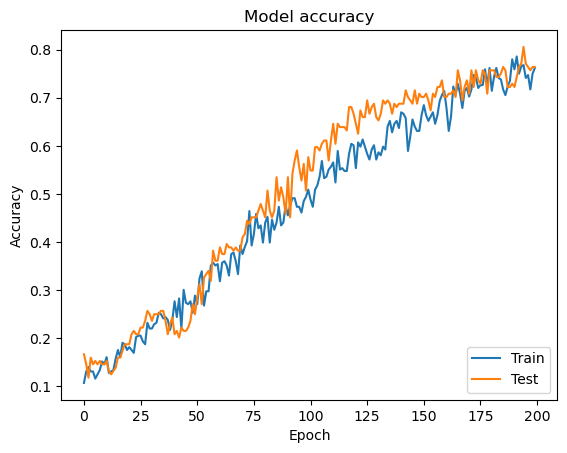

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

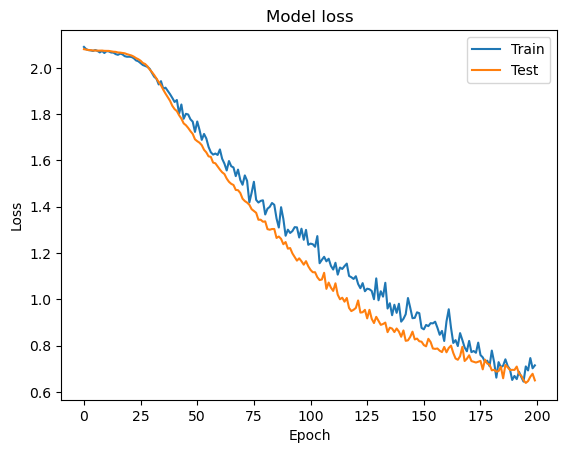

In [11]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:
model.save('chatbot_model_test.h5')